# Model_2_Pose_Estimation_YOLOv8

# Introduction

Source: https://docs.ultralytics.com/

Dataset: https://cocodataset.org/#keypoints-2017

Metric: https://docs.ultralytics.com/datasets/pose/coco/

# Preparing the Model

In [ ]:
# installing ultralytics it is recommended to use a virtual environment
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# importing YOLO = You Only Look Once
from ultralytics import YOLO

In [ ]:
# this is a pretrained model for post estimation
# more models for YOLOV8 can be found here https://docs.ultralytics.com/models/yolov8/#performance-metrics
# more models for YOLOV8 post estimation can be found here https://docs.ultralytics.com/tasks/pose/
model = YOLO('yolov8s-pose.pt')

100%|██████████| 22.4M/22.4M [00:00<00:00, 196MB/s]


In [ ]:
model.info()

YOLOv8s-pose summary: 250 layers, 11626046 parameters, 0 gradients, 30.4 GFLOPs


(250, 11626046, 0, 30.406830400000004)

In [ ]:
print(model)

YOLO(
  (model): PoseModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=

In [ ]:
# Train the model
results = model.train(data='coco8-pose.yaml', epochs=100, imgsz=640)

In [ ]:
def print_yolov8n_pose_summary():
    summary = """
             from  n    params  module                                       arguments
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]
 22        [15, 18, 21]  1   1035934  ultralytics.nn.modules.head.Pose             [1, [17, 3], [64, 128, 256]]
    YOLOv8n-pose summary: 250 layers, 3295470 parameters, 3295454 gradients, 9.3 GFLOPs
    """
    print(summary)

# Call the function to print the summary
print_yolov8n_pose_summary()



             from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256,

# Using the Model

In [ ]:
# Predict with the model
# predict on an image and with the save argument it will save it inside a folder with the skeletal overlay
results = model('https://raw.githubusercontent.com/Abyza/Project_Exercise_Posture_Correction/main/Creation_of_Models/Sample_Images/paulo3.png', save=True)

100%|██████████| 98.5k/98.5k [00:00<00:00, 7.22MB/s]


image 1/1 /content/paulo3.png: 640x640 1 person, 980.8ms
Speed: 16.9ms preprocess, 980.8ms inference, 6002.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict


In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()

print("Current working directory:", current_dir)


Current working directory: /content


In [ ]:
# sample image taken online
results = model(f'{current_dir}/paulo3.png', save=True)


image 1/1 /content/paulo3.png: 640x640 1 person, 2053.4ms
Speed: 13.8ms preprocess, 2053.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict


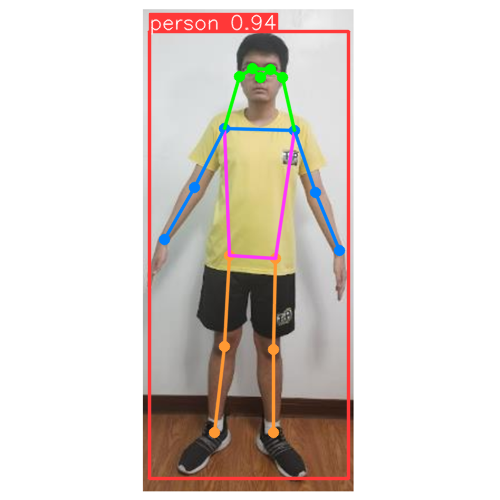

In [ ]:
from PIL import Image

# Display the resulting image
Image.open(Rf'{current_dir}/runs/pose/predict/paulo3.png')

In [ ]:
# more details about keypoints can be found here https://docs.ultralytics.com/modes/predict/#keypoints
# .xyn is normalized # xy is pixel coordinates
results[0].keypoints.xyn

tensor([[[0.5218, 0.1542],
         [0.5410, 0.1395],
         [0.5040, 0.1377],
         [0.5655, 0.1556],
         [0.4790, 0.1536],
         [0.5887, 0.2618],
         [0.4483, 0.2560],
         [0.6312, 0.3847],
         [0.3893, 0.3755],
         [0.6785, 0.5019],
         [0.3298, 0.4787],
         [0.5511, 0.5170],
         [0.4598, 0.5117],
         [0.5461, 0.6998],
         [0.4483, 0.6930],
         [0.5467, 0.8654],
         [0.4286, 0.8651]]])

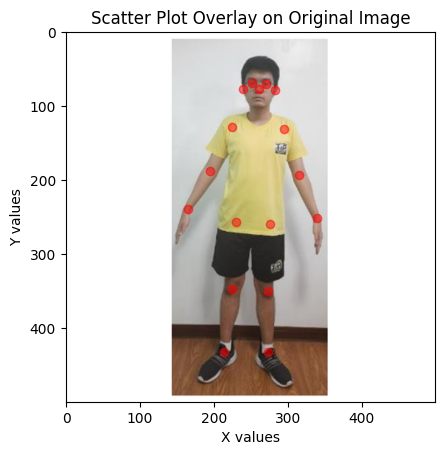

In [ ]:
# Showing the image with the overlay keypoints
import matplotlib.pyplot as plt
import numpy as np

# Loading the result of the model (original image)
img_bgr = results[0].orig_img.astype(np.uint8)
# Convert BGR to RGB format
img_rgb = img_bgr[..., ::-1]
white_image = img_rgb

# Showing the original image
plt.imshow(white_image)

# Loading the result of the model (keypoints xy)
data_tensor = results[0].keypoints.xy

# Extract x and y values from the tensor
x_values = data_tensor[:, :, 0].flatten().numpy()
y_values = data_tensor[:, :, 1].flatten().numpy()

# Showing the keypoints xy
# Red points with transparency
plt.scatter(x_values, y_values, c='red', alpha=0.5)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Overlay on Original Image')
plt.show()

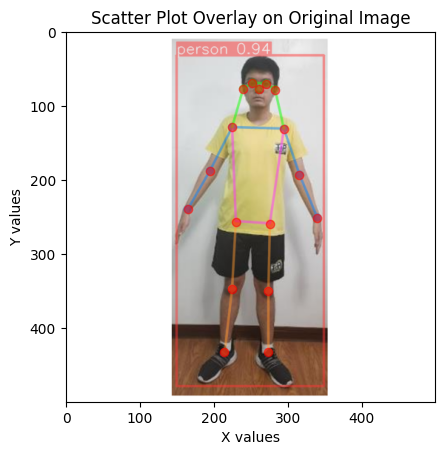

In [ ]:
# Showing the image with the overlay keypoints adding the model resulting image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Loading the result of the model (original image)
img_bgr = results[0].orig_img.astype(np.uint8)
# Convert BGR to RGB format
img_rgb = img_bgr[..., ::-1]
white_image = img_rgb

# Showing the original image
plt.imshow(white_image)

# Loading the result of the model (keypoints xy)
data_tensor = results[0].keypoints.xy

# Extract x and y values from the tensor
x_values = data_tensor[:, :, 0].flatten().numpy()
y_values = data_tensor[:, :, 1].flatten().numpy()

# Showing the keypoints xy
# Red points with transparency
plt.scatter(x_values, y_values, c='red', alpha=0.5)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Overlay on Original Image')

# Load and overlay PNG image
png_image = Image.open(rf'{current_dir}/runs/pose/predict/paulo3.png')  # Change path as needed
plt.imshow(png_image, alpha = 0.5 )

plt.show()

# Converting the Model

In [ ]:
# Export the model to ONNX format
model.export(format='onnx')

# Print confirmation
print("Model exported to ONNX format successfully.")

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'yolov8s-pose.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 56, 8400) (22.4 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 104.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 23.8s, saved as 'yolov8s-pose.onnx' (44.6 MB)

Export complete (27.9s)
Results saved to /content
Predict:         yolo predict task=pose model=yolov8s-pose.onnx imgsz=640  
Validate:        yolo val task=pose model=yolov8s-pose.onnx imgsz=640 data=/usr/src/app/ultralytics/datasets/coco-pose.yaml  
Visualize:       https://netron.app
Model exported to ONNX format successfully.


this link will help you undestand the output shape to get the keypoints: https://discussions.unity.com/t/extracting-keypoints-from-yolov8-pose-model/353968/6

"Briefly, the output tensor format is (batch, coordinate_number, box_number)

The output value is a score for each of 8400 possible boxes.

The 56 is a set of coordinates. The first 5 give coordinates of a box. (class, x,y, width, height)
(These will be the same each time as they are the same set of boxes whatever the input).

The next 51 give coordinates of a 17 body parts (x,y,visibility).

So you would probably want to take the box coordinates and feed them through an NMS to pick out the best boxes (as in our example) which gives a list of ids which you can then pick out the best poses. (See also the blaze face example which does something similar).

I recommend printing out some of the output numbers to the console to get a hang of them. And try drawing some to the screen."

\- PaulBUnity





In [ ]:
import onnx

# Load the ONNX model
onnx_model = onnx.load('/content/yolov8s-pose.onnx')

# Display the inputs of the model
print("Inputs:")
for input in onnx_model.graph.input:
    print(input.name, input.type)

# Display the outputs of the model
print("\nOutputs:")
for output in onnx_model.graph.output:
    print(output.name, output.type)

# Display the layers of the model
print("\nLayers:")
for node in onnx_model.graph.node:
    print(node.op_type, node.name)

Inputs:
images tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
    dim {
      dim_value: 3
    }
    dim {
      dim_value: 640
    }
    dim {
      dim_value: 640
    }
  }
}


Outputs:
output0 tensor_type {
  elem_type: 1
  shape {
    dim {
      dim_value: 1
    }
    dim {
      dim_value: 56
    }
    dim {
      dim_value: 8400
    }
  }
}


Layers:
Conv /model.0/conv/Conv
Sigmoid /model.0/act/Sigmoid
Mul /model.0/act/Mul
Conv /model.1/conv/Conv
Sigmoid /model.1/act/Sigmoid
Mul /model.1/act/Mul
Conv /model.2/cv1/conv/Conv
Sigmoid /model.2/cv1/act/Sigmoid
Mul /model.2/cv1/act/Mul
Constant Constant_47
Split /model.2/Split
Conv /model.2/m.0/cv1/conv/Conv
Sigmoid /model.2/m.0/cv1/act/Sigmoid
Mul /model.2/m.0/cv1/act/Mul
Conv /model.2/m.0/cv2/conv/Conv
Sigmoid /model.2/m.0/cv2/act/Sigmoid
Mul /model.2/m.0/cv2/act/Mul
Add /model.2/m.0/Add
Concat /model.2/Concat
Conv /model.2/cv2/conv/Conv
Sigmoid /model.2/cv2/act/Sigmoid
Mul /model.2/cv2/act/Mul
Conv /model

In [ ]:
import os

# Define the current and new file names
current_filename = 'yolov8s-pose.onnx'
new_filename = 'model_2_post_estimation_yolo_v8.onnx'

# Rename the file
os.rename(current_filename, new_filename)

# Print confirmation
print(f"File '{current_filename}' renamed to '{new_filename}'.")

File 'yolov8s-pose.onnx' renamed to 'model_2_post_estimation_yolo_v8.onnx'.


# Testing the Converted Model

In [ ]:
import onnx

def check_layers_and_weights(onnx_model):
    # Number of layers
    num_layers = len(onnx_model.graph.node)

    # Number of weights
    num_weights = len(onnx_model.graph.initializer)

    if num_layers > 0 and num_weights > 0:
        print("The ONNX model contains both layers and weights.")
    elif num_layers > 0:
        print("The ONNX model contains only layers (no weights).")
    elif num_weights > 0:
        print("The ONNX model contains only weights (no layers).")
    else:
        print("The ONNX model contains neither layers nor weights.")

    print("Number of layers:", num_layers)
    print("Number of weights:", num_weights)

# Load the ONNX model
onnx_model = onnx.load('/content/model_2_post_estimation_yolo_v8.onnx')

# Check layers and weights
check_layers_and_weights(onnx_model)

The ONNX model contains both layers and weights.
Number of layers: 311
Number of weights: 145


In [ ]:
import onnx
import onnxruntime as ort
import numpy as np

# Load the ONNX model
onnx_model = onnx.load('model_2_post_estimation_yolo_v8.onnx')

# Create an ONNX runtime inference session
session = ort.InferenceSession('model_2_post_estimation_yolo_v8.onnx')

# Get the input name of the model
input_name = session.get_inputs()[0].name

# Define the input shape
input_shape = (1, 3, 640, 640)

# Generate sample input data
input_data = np.random.rand(*input_shape).astype(np.float32)

# Perform inference
output = session.run(None, {input_name: input_data})

# Print the output
print(output)

[array([[[     10.136,      15.534,      19.966, ...,       536.3,      556.71,      575.13],
        [     14.614,      11.113,      11.715, ...,      560.85,      555.81,      551.64],
        [     21.969,      31.743,      41.018, ...,      208.74,      168.42,      132.64],
        ...,
        [     3.3112,      8.6633,       13.71, ...,      592.78,      613.04,      614.28],
        [     15.096,      13.154,      14.155, ...,      629.58,      628.44,      634.86],
        [   0.080414,     0.08595,     0.11905, ...,    0.061291,    0.076502,    0.089524]]], dtype=float32)]


In [ ]:
import onnx
import onnxruntime as ort
import numpy as np
import time

def inference_onnx_model(model_path, input_shape):
    # Load the ONNX model
    onnx_model = onnx.load(model_path)

    # Create an ONNX runtime inference session
    session = ort.InferenceSession(model_path)

    # Get the input name of the model
    input_name = session.get_inputs()[0].name

    # Generate sample input data
    input_data = np.random.rand(*input_shape).astype(np.float32)

    # Perform inference and measure execution time
    start_time = time.time()
    output = session.run(None, {input_name: input_data})
    end_time = time.time()

    # Calculate execution time
    execution_time = end_time - start_time

    return output, execution_time

# Example usage:
model_path = 'model_2_post_estimation_yolo_v8.onnx'
input_shape = (1, 3, 640, 640)

output, execution_time = inference_onnx_model(model_path, input_shape)
print("Execution time:", execution_time, "seconds")


Execution time: 0.6066632270812988 seconds


In [ ]:
import numpy as np

# Define the number of tests
num_tests = 100

# Initialize an empty list to store execution times
execution_times = []

# Run the function multiple times
for _ in range(num_tests):
    output, execution_time = inference_onnx_model(model_path, input_shape)
    execution_times.append(execution_time)

# Calculate the average execution time
average_execution_time = np.mean(execution_times)

print("Average execution time over", num_tests, "tests:", average_execution_time, "seconds")

Average execution time over 100 tests: 0.6005023264884949 seconds


In [ ]:
output[0].shape

(1, 56, 8400)

# Summary

You Only Look Once version 8

| YOLOv8_s                    | Model #2         |
|-----------------------------|------------------|
| mAP (Mean Average Precision)| 86.2             |
| Time on Laptop CPU          | 0.0795 sec       |
| Time on Google Collab CPU   | 0.6005 sec       |
| Number of layers            | 311              |
| Number of weights           | 145              |
| Onnx Model Size             | 45.7 mb          |
| Input shape                 | (1, 3, 640, 640) |
| Output shape                | (1, 56, 8400)    |
| # of Keypoints              | 17               |

Google Collab Link:

https://colab.research.google.com/drive/1MidkwYND9VirY5Nz7cyPLgoBH8go7tQI